<a href="https://colab.research.google.com/github/Ankita-Dey/Thesis/blob/main/Choropleth_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 270 kB/s 
     |████████████████████████████████| 6.3 MB 25.3 MB/s 


In [ ]:
pip install mapclassify

In [ ]:
import mapclassify
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shp = "drive/MyDrive/Census_2011_map/2011_Dist.shp"

In [ ]:
df1 = gpd.read_file(shp)
df1['ST_NM'] = df1['ST_NM'].str.upper()
df1 = df1.rename(columns={'DISTRICT': 'District', 'ST_NM': 'State'})
df1 = df1[["State","District","geometry"]]
# df1.head()
# df1.plot(figsize = (8,8))

In [ ]:
# df['state'] = df['state'].replace(['Uttaranchal'],'Uttarakhand')
rename_dist = {'Bauda':'Baudh', 'Chamrajnagar':'Chamarajanagar', 'East Nimar':'Khandwa (East Nimar)', 'Garhchiroli':'Gadchiroli',
 'Janjgir-champa':'Janjgir', 'Kaimur (bhabua)':'Kaimur (Bhabua)', 'Kansiram Nagar':'Kanshiram Nagar', 'Lawangtlai':'Lawngtlai',
 'Leh (ladakh)':'Leh(Ladakh)', 'Maharajganj':'Mahrajganj', 'Marigaon':'Morigaon', 'Nagappattinam':'Nagapattinam',
 'Nicobar':'Nicobars', 'North & Middle Andaman':'North  & Middle Andaman', 'North 24 Parganas':'North Twenty Four Parganas',
 'Pashchim Medinipur':'Paschim Medinipur', 'Ri Bhoi':'Ribhoi', 'Sant Ravi Das Nagar(bhadohi)':'Sant Ravidas Nagar (Bhadohi)',
 'Saraikela-kharsawan':'Saraikela', 'Saran (chhapra)':'Saran', 'Siddharth Nagar':'Siddharthnagar', 'Y.s.r.':'Y.S.R.',
 'South 24 Parganas':'South Twenty Four Parganas', 'Virudunagar':'Virudhunagar', 'West Nimar':'Khargone (West Nimar)'}
df1["District"].replace(rename_dist, inplace=True)
df1.loc[(df1.State == "SIKKIM") & (df1.District == "East"), "District"] = "East District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "West"), "District"] = "West District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "North"), "District"] = "North  District"
df1.loc[(df1.State == "SIKKIM") & (df1.District == "South"), "District"] = "South District"
df1.loc[(df1.State == "ARUNANCHAL PRADESH"), "State"] = "ARUNACHAL PRADESH"
df1.loc[(df1.State == "ANDAMAN & NICOBAR ISLAND"), "State"] = "ANDAMAN & NICOBAR ISLANDS"
df1.loc[(df1.State == "DADARA & NAGAR HAVELLI"), "State"] = "DADRA & NAGAR HAVELI"

In [ ]:
# # FOR F/M OR R/U RATIO AT CERTAIN EDUCATION LEVEL
# # GIVE EDUCATION LEVEL TO BE COMPARED BELOW (CHANGE LEVEL TO TOTAL TO GET RATIO)
# level = "Literate"
# # level = "Graduate & above"
# # level = "Literate"
# level = "Secondary"
# distdata = "drive/MyDrive/Data/C08.csv"
# df2 = pd.read_csv(distdata)

# df2["Graduate & above"] = df2["Graduate & above"] + df2["Non-technical degree"]+df2["Technical degree"]
# df2["Secondary"] = df2["Secondary"] + df2["Higher secondary"] + df2["Graduate & above"]

# df2 = df2[(df2["Urban/Rural"]!="Total") & (df2.Caste=="All") & (df2.Sex=="Female") & (df2.Age=="All ages")] #R/U
# # df2 = df2[(df2["Urban/Rural"]=="Rural") & (df2.Caste=="All") & (df2.Sex!="Persons") & (df2.Age=="All ages")] #F/M

# for col in df2.columns[7:]:
#     df2[col] = df2[col]*100/df2["Total"]

# for col in df2.columns[6:]:
#     df2[col] = df2[col].div(df2.groupby(["State","District"])[col].shift(-1))*100 #R/U
#     # df2[col] = df2[col].div(df2.groupby(["State","District"])[col].shift(1))*100 # F/M

# df2 = df2.dropna()

# df2 = df2[["State","District",level]]
# df2 = df2[(df2.State != "INDIA") & (df2.District != "All")]

In [ ]:
# # FOR F/M OR R/U RATIO FOR MAIN WORKERS
# level = "Main worker"
# df2 = pd.read_csv("drive/MyDrive/Data/B03.csv")
# df2 = df2[(df2['Educational level'].isin(['Total']))]
# df2 = df2.groupby(['State', 'District', 'Urban/Rural', 'Caste', 'Sex'], as_index=False).sum()
# df2["Main worker"] = df2['Main worker']/df2['Total']

# df2 = df2[(df2["Urban/Rural"]!="Total") & (df2.Caste=="All") & (df2.Sex=="Male")] #R/U
# # df2 = df2[(df2["Urban/Rural"]=="Rural") & (df2.Caste=="All") & (df2.Sex!="Persons")] #F/M

# df2["Main worker"] = df2["Main worker"].div(df2.groupby(["State","District"])["Main worker"].shift(-1))*100 #R/U & F/M

# df2 = df2.dropna()

# df2 = df2[["State","District","Main worker"]]
# df2 = df2[(df2.State != "INDIA") & (df2.District != "All")]

In [ ]:
# FOR Reach & R/U RATIO AT CE LEVELFOR HOUSEHOLD
df2 = pd.read_csv("drive/MyDrive/Data/HH1.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Total households', 'Total good households']]

hh = pd.read_csv("drive/MyDrive/Data/HH7.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Electricity']]
df2 = pd.merge(df2, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

hh = pd.read_csv("drive/MyDrive/Data/HH8.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Households with latrine within premises']]
df2 = pd.merge(df2, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

hh = pd.read_csv("drive/MyDrive/Data/HH9.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'With bathroom']]
df2 = pd.merge(df2, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

hh = pd.read_csv("drive/MyDrive/Data//HH12.csv")[['State', 'District', 'Urban/Rural', 'Caste', 'Households with Radio',
       'Households with TV', 'Households with Computer with internet', 'Households with Computer without internet',
       'Households with Landline only', 'Households with mobile only', 'Households with Landline and mobile', 
       'Households with bicycle', 'Households with motorcycle', 'Households with car','Households with TV, Computer, phone and motor vehicle',
       'Households without any assets', 'Households availing banking services']]

hh['Phone'] = hh['Households with Landline only']+hh['Households with mobile only']+hh['Households with Landline and mobile']
hh['Computer'] = hh['Households with Computer with internet'] + hh['Households with Computer without internet']
hh['Vehicle'] = hh['Households with bicycle']+hh['Households with motorcycle']+hh['Households with car']
hh['Motor Vehicle'] = hh['Households with motorcycle']+hh['Households with car']

df2 = pd.merge(df2, hh, on=['State', 'District', 'Urban/Rural', 'Caste'], how='inner')

for col in df2.columns[5:]:
    df2[col] = df2[col]*100/df2['Total households']

df2.loc[(df2.State == "CHATTISGARH"), "State"] = "CHHATTISGARH"
df2.loc[(df2.District == "East Nimar"), "District"] = "Khandwa (East Nimar)"
df2.loc[(df2.District == "West Nimar"), "District"] = "Khargone (West Nimar)"

level = 'Vehicle'
df2 = df2[(df2["Urban/Rural"]=="Rural") & (df2.Caste=="All")].dropna()
df2 = df2[["State","District",level]]
df2 = df2[(df2.State != "INDIA") & (df2.District != "All")]

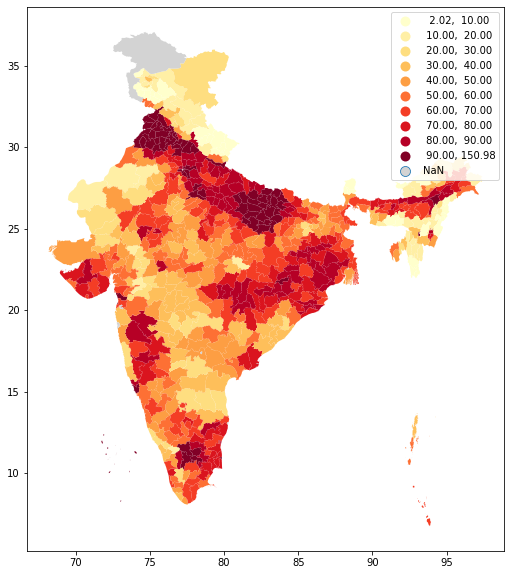

In [ ]:
df = df1.merge(df2, on=(["State", "District"]), how='left')
df = df.set_index(["District","State"])
fig, ax = plt.subplots(1, figsize=(10, 10))
df.plot(column=level, cmap="YlOrRd", linewidth=0.8, ax=ax, legend=True, scheme="User_Defined", 
        missing_kwds= {"color": "lightgrey"}, classification_kwds=dict(bins=[10,20,30,40,50,60,70,80,90]))

Below are rough cells


In [ ]:
# set(df1.District)-set(df2.District)
set(df2.District)-set(df1.District)

set()

In [ ]:
df3 = pd.read_csv("drive/MyDrive/Data/C10.csv")
df3 = df3[(df3["Urban/Rural"]=="Total") & (df3.Caste=="All") & (df3.Sex=="Persons") & (df3.Age=="All ages")]
df3 = df3[["State","District","Total people"]]
df3 = df3[(df3.State != "INDIA") & ((df3.District != "All"))]
df3.head(10)
set(df3.District)-set(df2.District)

{'Central',
 'Chennai',
 'Hyderabad',
 'Kinnaur',
 'Kolkata',
 'Lahul & Spiti',
 'Mahe',
 'Mumbai',
 'Mumbai Suburban',
 'New Delhi',
 'Nicobars',
 'Yanam'}